Chapter 20
# 填充曲线下方剖面
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [2]:
# 导入包
import math
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal
# 导入符号变量
import os

from matplotlib import cm
# 导入色谱模块

# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

In [4]:
def mesh(num = 101):
    
    # number of mesh grids
    x_array = np.linspace(-3,3,num)
    y_array = np.linspace(-3,3,num)
    xx,yy = np.meshgrid(x_array,y_array)
    
    return xx, yy

### 1. 二元高斯分布

In [5]:
xx1, xx2 = mesh(num = 101)
points = np.dstack((xx1, xx2))
# 将 xx1和xx2 在深度方向拼接，得到代表 (x1, x2) 坐标的数组

bivariate_normal = multivariate_normal([0, 0], 
                                      [[1, -0.6], 
                                       [-0.6, 1]])

PDF_ff = bivariate_normal.pdf(points)
# 二元高斯分布概率密度函数值 

In [10]:
points

array([[[-3.  , -3.  ],
        [-2.94, -3.  ],
        [-2.88, -3.  ],
        ...,
        [ 2.88, -3.  ],
        [ 2.94, -3.  ],
        [ 3.  , -3.  ]],

       [[-3.  , -2.94],
        [-2.94, -2.94],
        [-2.88, -2.94],
        ...,
        [ 2.88, -2.94],
        [ 2.94, -2.94],
        [ 3.  , -2.94]],

       [[-3.  , -2.88],
        [-2.94, -2.88],
        [-2.88, -2.88],
        ...,
        [ 2.88, -2.88],
        [ 2.94, -2.88],
        [ 3.  , -2.88]],

       ...,

       [[-3.  ,  2.88],
        [-2.94,  2.88],
        [-2.88,  2.88],
        ...,
        [ 2.88,  2.88],
        [ 2.94,  2.88],
        [ 3.  ,  2.88]],

       [[-3.  ,  2.94],
        [-2.94,  2.94],
        [-2.88,  2.94],
        ...,
        [ 2.88,  2.94],
        [ 2.94,  2.94],
        [ 3.  ,  2.94]],

       [[-3.  ,  3.  ],
        [-2.94,  3.  ],
        [-2.88,  3.  ],
        ...,
        [ 2.88,  3.  ],
        [ 2.94,  3.  ],
        [ 3.  ,  3.  ]]])

### 2. 指定 x1 具体值

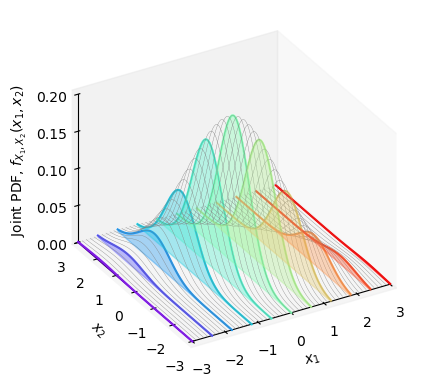

In [16]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

ax.plot_wireframe(xx1, xx2, PDF_ff,
                  color = [0.5,0.5,0.5],
                  rstride=0, cstride=2,
                  linewidth = 0.25)

x1 = np.linspace(-3,3,101)
x2 = np.linspace(-3,3,101)
x1_loc_array = np.arange(0,len(x1),10)
facecolors = cm.rainbow(np.linspace(0, 1, len(x1_loc_array)))

for idx in range(len(x1_loc_array)):
    x_loc = x1_loc_array[idx]
    x_idx = x1[x_loc]
    x_i_array = x2*0 + x_idx
    z_array = PDF_ff[:,x_loc]
    
    ax.plot(x_i_array, x2, z_array, color=facecolors[idx,:],
            linewidth = 1.5)
    
    ax.add_collection3d(plt.fill_between(x2, 0*z_array, z_array, 
                                         color=facecolors[idx,:], 
                                         alpha=0.2), 
                        # 给定填充对象
                        zs=x_idx, # 指定位置
                        zdir='x') # 指定方向
    

ax.set_proj_type('ortho')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('Joint PDF, $f_{X_1,X_2}(x_1,x_2)$')
ax.set_xlim(xx1.min(), xx1.max())
ax.set_ylim(xx2.min(), xx2.max())
ax.set_zticks([0, 0.05, 0.1, 0.15, 0.2])
ax.set_zlim3d([0,0.2])
ax.view_init(azim=-120, elev=30)
ax.grid(False)
fig.savefig('Figures/指定 x1 具体值.svg', format='svg')

### 3. 指定 x2 具体值

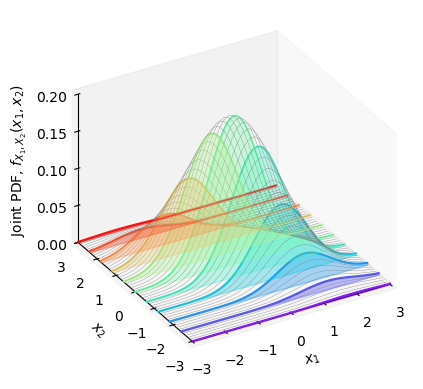

In [15]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

ax.plot_wireframe(xx1, xx2, PDF_ff,
                  color = [0.5,0.5,0.5],
                  rstride=2, cstride=0,
                  linewidth = 0.25)

x2_loc_array = np.arange(0,len(x1),10)
facecolors = cm.rainbow(np.linspace(0, 1, len(x2_loc_array)))

for idx in range(len(x2_loc_array)):
    x_loc = x2_loc_array[idx]
    x_idx = x2[x_loc]
    x_i_array = x1*0 + x_idx
    z_array = PDF_ff[x_loc,:]
    
    ax.plot(x1, x_i_array, z_array, color=facecolors[idx,:],
            linewidth = 1.5)
    
    ax.add_collection3d(plt.fill_between(x1, 0*z_array, z_array, 
                                         color=facecolors[idx,:], 
                                         alpha=0.2), 
                        zs=x_idx, zdir='y')

ax.set_proj_type('ortho')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('Joint PDF, $f_{X_1,X_2}(x_1,x_2)$')
ax.set_xlim(xx1.min(), xx1.max())
ax.set_ylim(xx2.min(), xx2.max())
ax.set_zticks([0, 0.05, 0.1, 0.15, 0.2])
ax.set_zlim3d([0,0.2])
ax.view_init(azim=-120, elev=30)
ax.grid(False)
fig.savefig('Figures/指定 x2 具体值.svg', format='svg')

In [ ]:
# Repo: https://github.com/Visualize-ML
# Book 2 Beauty of Visualization  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023